In [2]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

# web scraping
import requests
import bs4
import csv
import json 
import re
from io import StringIO

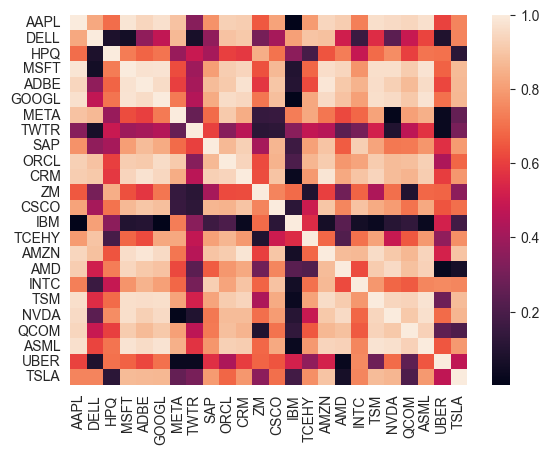

In [3]:
stock_list = ['AAPL', 'DELL', 'HPQ', 'MSFT', 'ADBE', 'GOOGL', 'META', 
            'TWTR', 'SAP', 'ORCL', 'CRM', 'ZM', 'CSCO', 'IBM', 'TCEHY', 'AMZN', 
            'AMD', 'INTC', 'TSM', 'NVDA', 'QCOM', 'ASML','UBER', 'TSLA']

opening_df = pd.DataFrame()
monthly_opening = pd.DataFrame()

for name in stock_list:
    # read files
    fname = r"C:\IIT\DS203\Project\yfinance\\" + name + ".csv"
    df = pd.read_csv(fname)

    opening_df[name] = df['Open']

Matrix = opening_df.corr(method='pearson')
fig, ax = plt.subplots()
sns.heatmap(abs(Matrix), annot=False)
plt.show()

,AAPL,DELL,HPQ,MSFT,ADBE,GOOGL,META,TWTR,SAP,ORCL,...,TCEHY,AMZN,AMD,INTC,TSM,NVDA,QCOM,ASML,UBER,TSLA
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.799378,1.149425,-1.707655,1.980954,4.032258,5.060116,-13.127231,1.840359,1.863623,2.698290,...,0.134109,0.042129,4.771114,1.627629,-1.456315,4.732117,1.734104,0.884084,-7.642855,35.736783
2,-0.399299,-2.954545,2.501740,0.709745,-1.136957,0.473077,-10.730901,-11.822339,3.142486,0.477703,...,-4.062504,-0.694883,0.030764,1.289062,2.167493,2.051407,2.795454,1.996106,-1.237431,-3.063168
3,0.561276,0.702577,0.000000,-0.259643,0.627291,2.437213,-3.802514,7.802469,1.460770,1.426310,...,-0.186131,1.717554,4.275618,2.121092,4.146585,3.409677,0.707494,4.916470,2.766895,-8.000041
4,1.966769,1.744185,1.728819,0.148758,1.428569,2.088124,5.036659,-6.023823,0.411355,1.640625,...,3.496506,-2.960178,-0.442482,-0.339880,1.666652,0.442916,3.051590,0.181976,5.359412,-13.043477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,-4.625713,NaN,-3.887689,-4.083505,-6.827873,-5.080276,NaN,NaN,-3.465762,-2.517939,...,NaN,-4.983558,-7.761904,-2.900600,-4.000000,-5.826720,-12.071436,-6.222742,NaN,NaN
4240,0.021117,NaN,2.509364,-1.154070,-2.251995,-1.065800,NaN,NaN,2.539924,1.632764,...,NaN,-1.059807,7.554637,0.437155,2.516664,7.229938,2.136428,4.888843,NaN,NaN
4241,-3.504818,NaN,3.580561,2.040911,-0.485572,2.201402,NaN,NaN,1.327338,0.223859,...,NaN,0.502786,0.688000,2.865437,1.804586,1.730300,0.816061,2.699250,NaN,NaN
4242,2.406829,NaN,2.292768,3.022655,4.214968,1.856098,NaN,NaN,0.948949,1.103661,...,NaN,-1.261551,1.843312,1.410436,2.794640,4.027267,3.805356,4.932295,NaN,NaN


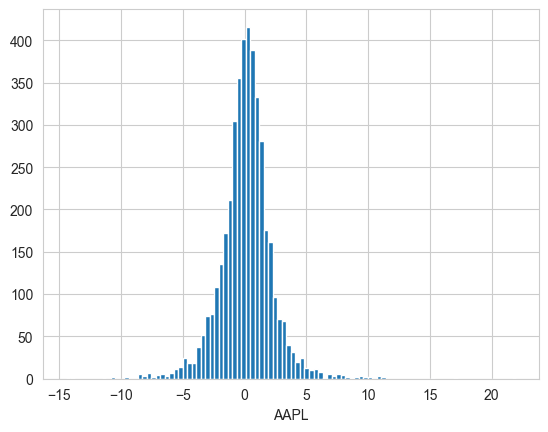

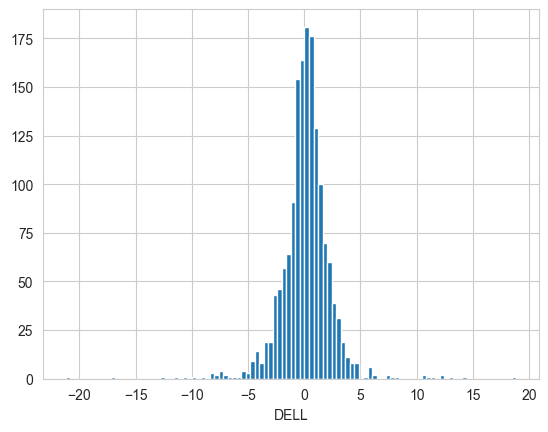

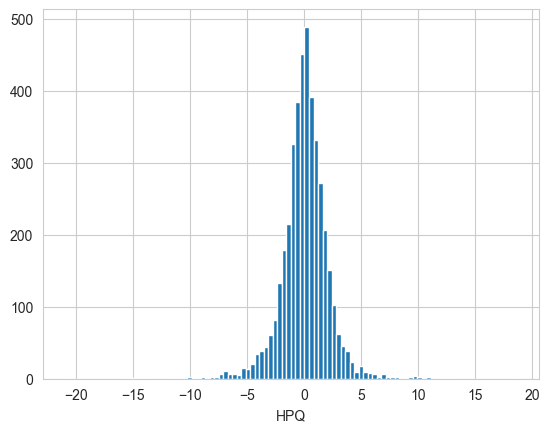

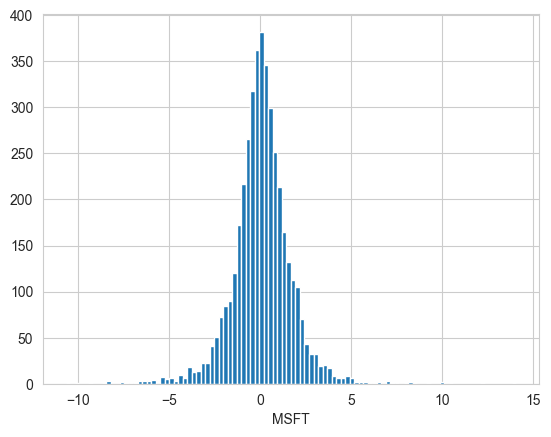

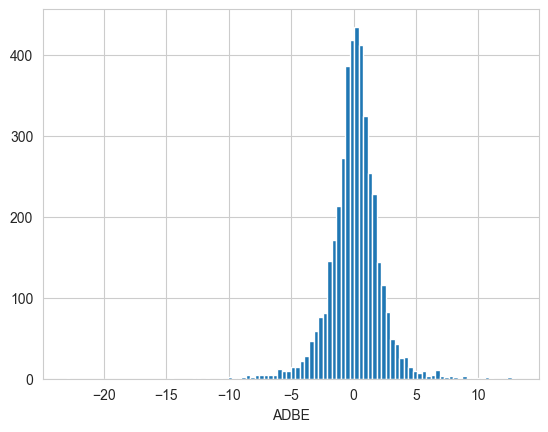

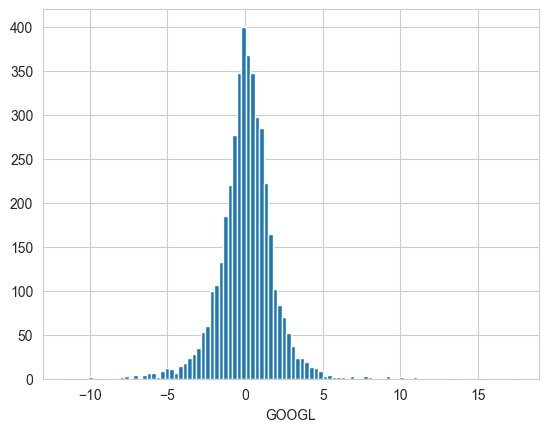

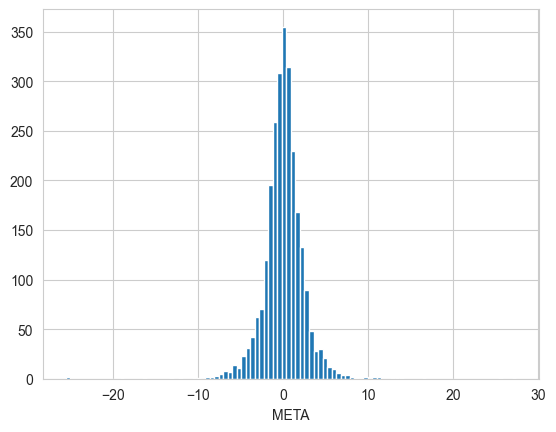

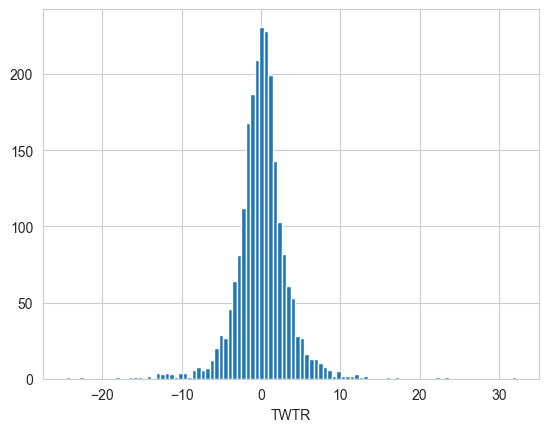

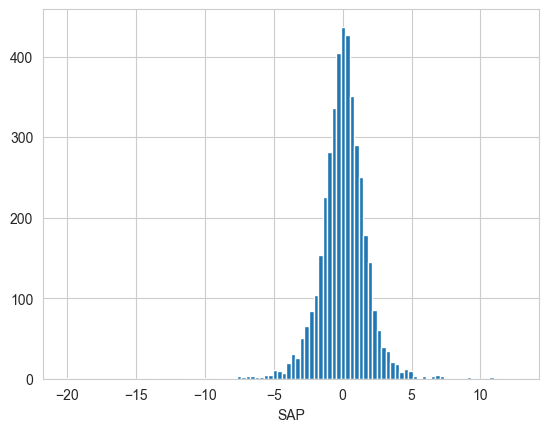

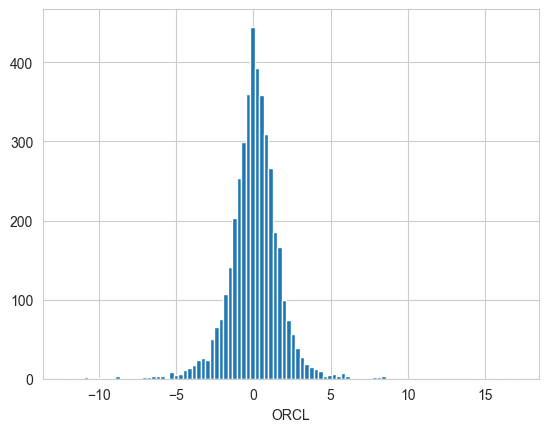

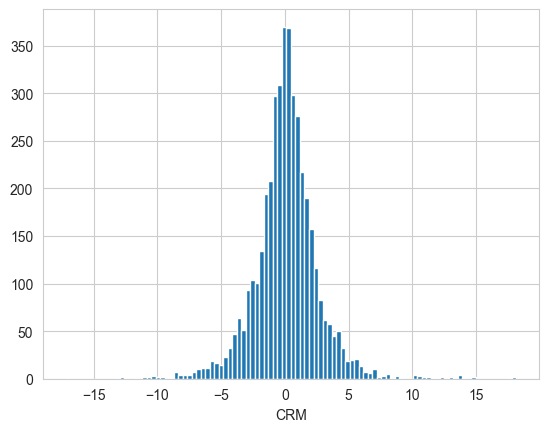

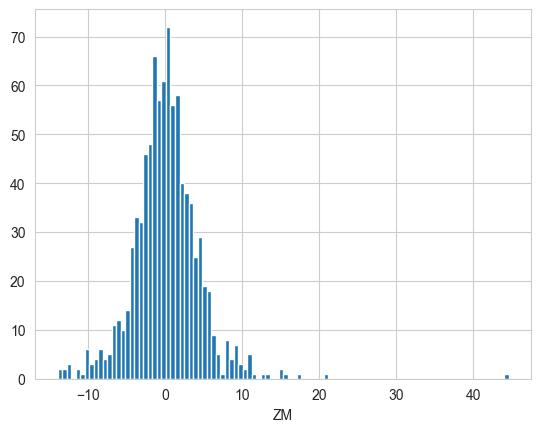

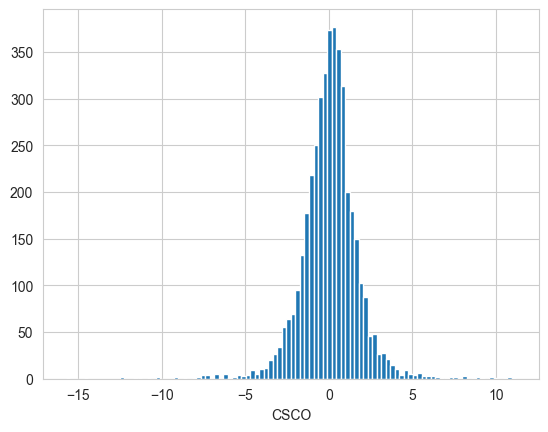

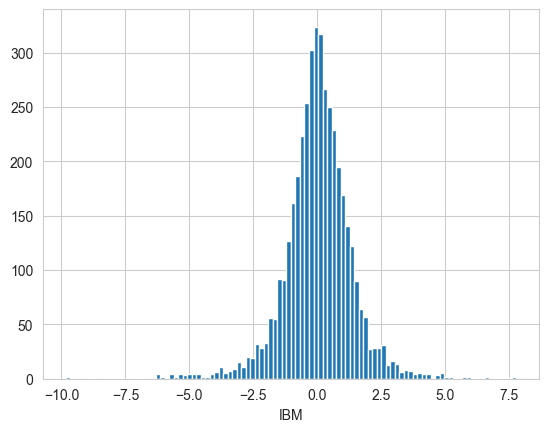

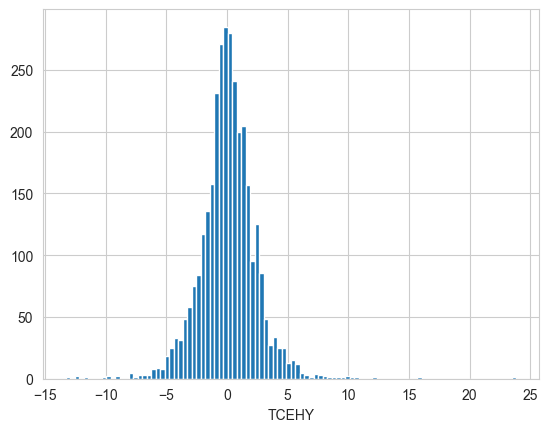

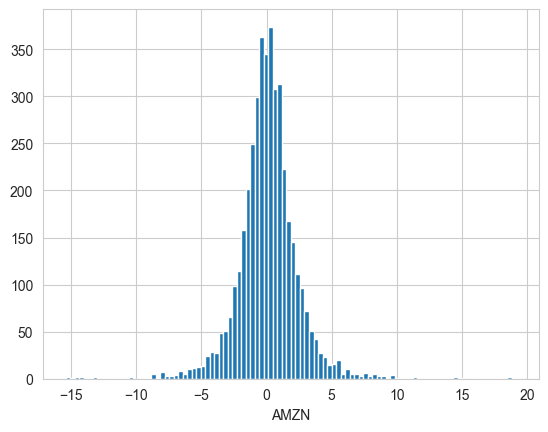

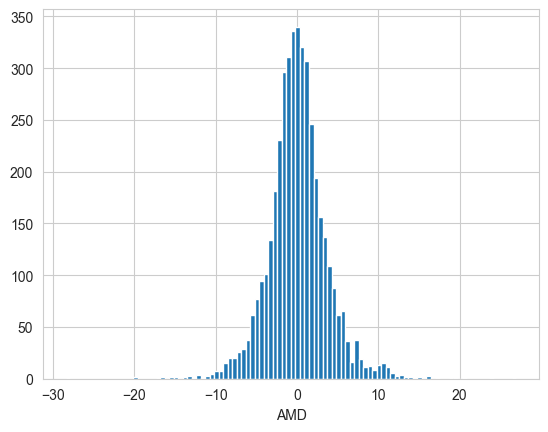

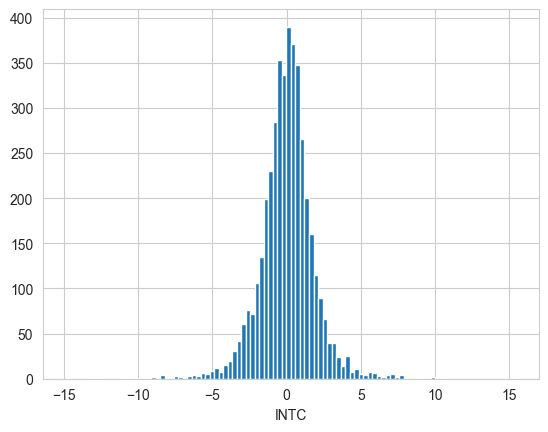

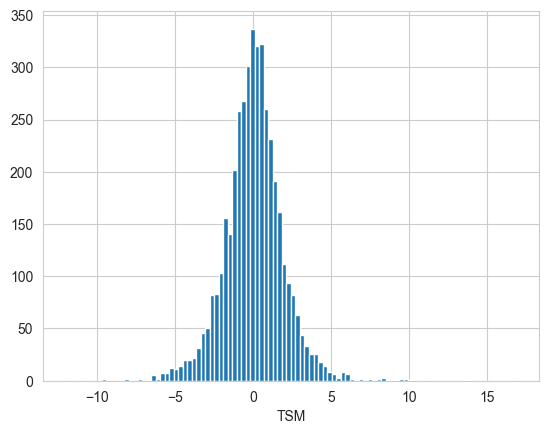

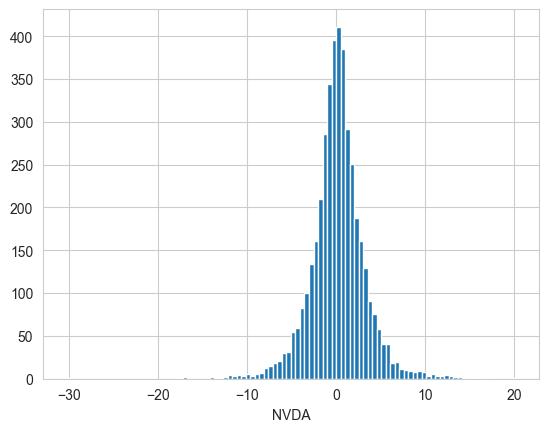

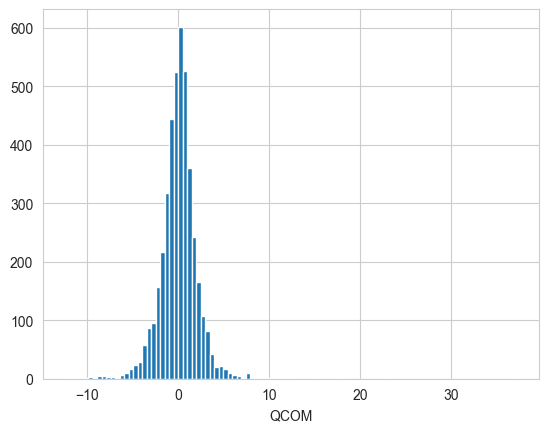

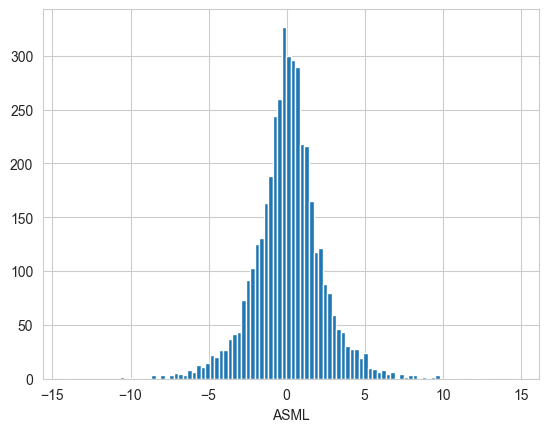

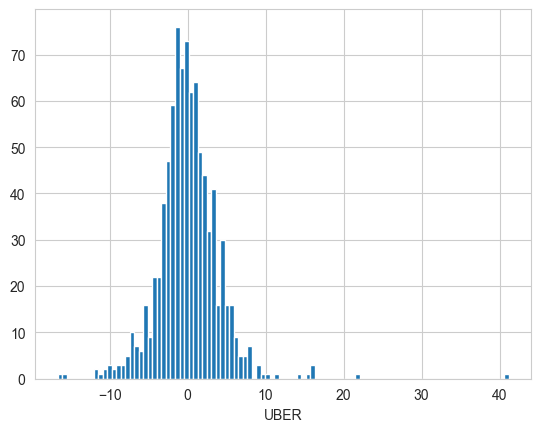

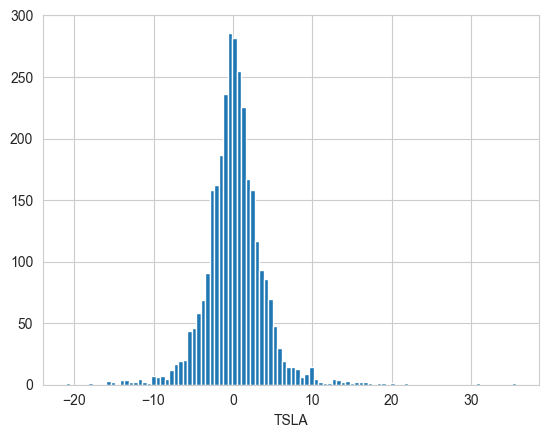

In [4]:
# calculating average returns over the months for these companies

for name in stock_list:
    # read files
    fname = r"C:\IIT\DS203\Project\yfinance\\" + name + ".csv"
    df = pd.read_csv(fname)

    monthly_opening[name] = df['Open']
    for j in range(1, len(monthly_opening[name])):
        i = len(monthly_opening[name]) - j
        monthly_opening[name][i] = (monthly_opening[name][i] - monthly_opening[name][i-1])/monthly_opening[name][i-1]*100
    monthly_opening[name][0] = 0

display(monthly_opening)

for column in monthly_opening:
    plt.figure()
    plt.hist(monthly_opening[column], bins = 100) 
    plt.xlabel(column)
    plt.show()